In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

# M "malignant" kötü huylu, B "benign" iyi huylu; tablonun 3-31 aralığı sayılmış kötücül yada iyi huylu hücreler içindir.

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
le.transform(['M', 'B'])
# we transformed "1" malignant, "0" benign

array([1, 0])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1)

# %20 lik kısmı test için ayrıldı

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#StandardScaler, pca and LogisticRegression used for transformation and training test

In [9]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr, 
                      X=X_train, 
                      y=y_train, 
                      train_sizes=np.linspace(0.1, 1.0, 10), 
                      cv=10,
                       n_jobs=1)

In [11]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

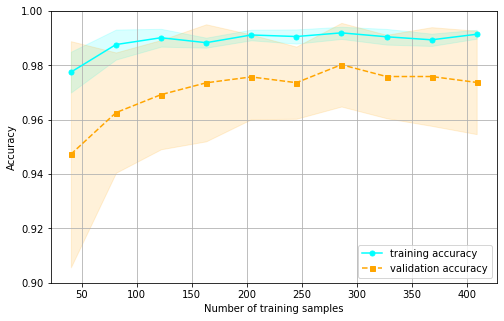

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5) 
plt.rcParams['axes.titlesize'] = 'large'


plt.plot(train_sizes, train_mean, 
         color='cyan', marker='o', 
         markersize=5, 
          label='training accuracy')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='cyan')
plt.plot(train_sizes, test_mean, 
          color='orange', linestyle='--', 
          marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='orange')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

# Learning Curve function grafik oluşturuldu
#Train_sizes=np.linspace(0.1, 1.0, 10) ayarını eğitim seti boyutları için 10 eşit aralıklı göreli aralık kullanacak şekilde ayarlandı
#Cross accuracy doğruluğunu hesaplamak için katmanlı k-kat cross doğrulama kullanıldı
#Kanser teşhisi ve varyans problemleri learning curves cv parametreleri ile kuruldu

In [21]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


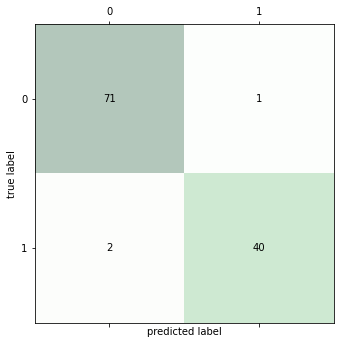

In [29]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j], 
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# sınıf 1 kötü huylu malignant, sınıf 0 ise iyi huylu benign
#Model, örneklerden 71'ini sınıf 0'a (gerçek negatifler) ve 40 örneği sınıf 1'e (gerçek pozitifler) ait olacak şekilde sınıflandırdı